In [1]:
# Libraries
import math
import pandas as pd
import sympy as smp
import numpy as np
from sympy import *
from math import *

# Scipy stats
from scipy.stats import rv_discrete
from scipy.stats import binom
from scipy.stats import expon
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import nbinom
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import t
from scipy.stats import uniform


# Scipy operations
from scipy.integrate import quad
from scipy.misc import derivative
import scipy.integrate as integrate
import scipy.special as special

# Miscellaneous
import matplotlib.pyplot as plt
# from fractions import Fraction
from sympy import Rational as R
from sympy import nsimplify
from IPython.display import display, Math, Latex
%matplotlib inline
from IPython.display import Image, HTML

def answers(result, rounding):
    print(
        "{:<{}}".format(f"Exact result:", 15) + f"{result}," + "\n" + 
        "{:<{}}".format(f"Rounded ({rounding}): ", 15) + f"{round(float(result), rounding)}" + "\n" + 
        "{:<{}}".format(f"Fraction: ", 15) + f"{nsimplify(result, tolerance=1e-10)}"
    )

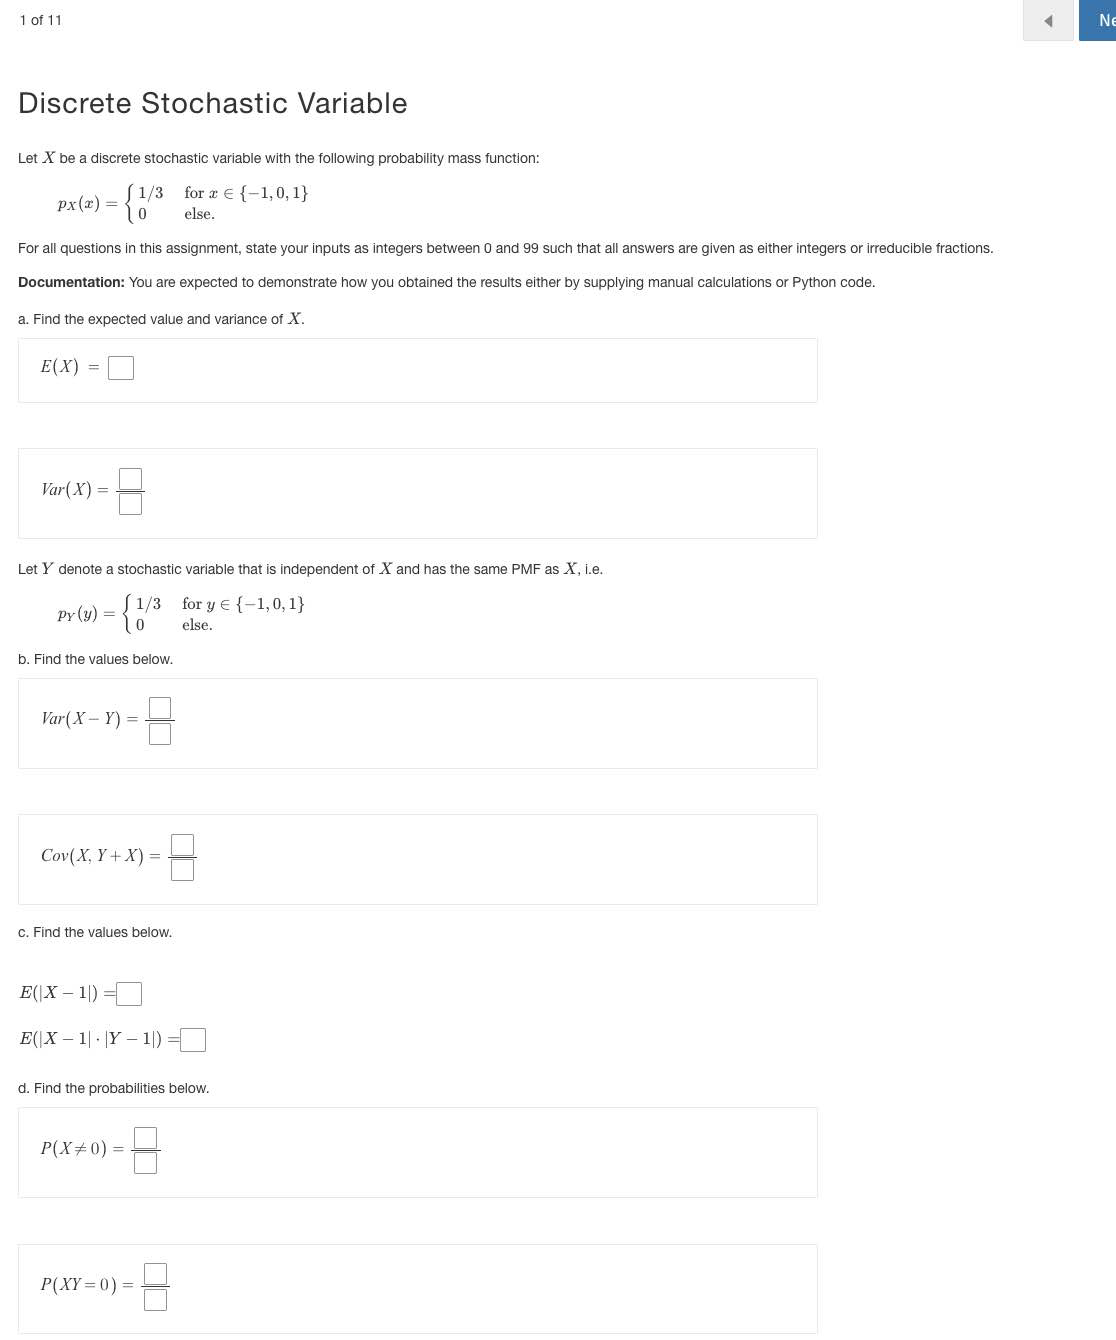

In [7]:
# Exercise 1:
Image('https://cdn.mathpix.com/snip/images/rEdNyulEuJ3yEOICJbMSyAyJqAHZgdnisEERHH1yDGI.original.fullsize.png', width = 700)

In [9]:
# a
E_X = R(1/3) * (-1) + R(1/3) * (0) + R(1/3) * (1)

print("E[X]: ")
answers(E_X, 2)
print()

E_X2 = R(1/3) * (-1)**2 + R(1/3) * (0)**2 + R(1/3) * (1)**2

V_X = E_X2 - E_X**2

print("V[X]")
answers(V_X, 2)

E[X]: 
Exact result:  0,
Rounded (2):   0.0
Fraction:      0

V[X]
Exact result:  6004799503160661/9007199254740992,
Rounded (2):   0.67
Fraction:      2/3


In [11]:
# b
V_Y = R(2,3) # Same distribution as X, just independent

# V[X-Y] = V[X] + V[-Y] (because independence), V[-Y] = V[Y] so, V[X-Y] = V[X] + V[Y]
V_X_MINUS_Y = 2*R(2,3)

print("V[X-Y]")
answers(V_X_MINUS_Y, 2)


# Cov(X, Y+X) = Cov(X, Y) + Cov(X, X)
# Cov(X, Y) = 0, because X and Y are independent
# Cov(X, X) = V[X]

Cov_X_Y_PLUS_X = 0 + V_X

Cov_X_Y_PLUS_X = R(2,3)

V[X-Y]
Exact result:  4/3,
Rounded (2):   1.33
Fraction:      4/3


In [12]:
# c
E_ABS_X_MINUS_1 = abs((-1 - 1)) * R(1/3) + abs((0 - 1)) * R(1/3) + abs((1 - 1)) * R(1/3)
# E[|X - 1|] = 2*R(1,3) + 1*R(1,3) + 0 = 3/3 = 1

print("E[abs(X-1)]: 1")
print()

# Let
# Z = |X - 1|
# W = |Y - 1|
# since X, Y are independent then Z and W are also independent
# therefore
# E[Z * W] = E[Z] * E[W] = E[|X - 1|] * E[|Y - 1|] = 1 * 1 = 1


E[abs(X-1)]:
Exact result:  18014398509481983/18014398509481984,
Rounded (2):   1.0
Fraction:      1


In [14]:
# d

# P(X != 0) = 1 - P(X = 0) = 1 - 1/3 = 2/3

# P(X*Y = 0) = 1 - (P(X = 1 and Y = 1) + P(X = 1 and Y = -1) + P(X = -1 and Y = 1) + P(X = -1 and Y = -1)) =
# = 1 - (4*(1/3)**2) = 1 - 4/9 = 5/9

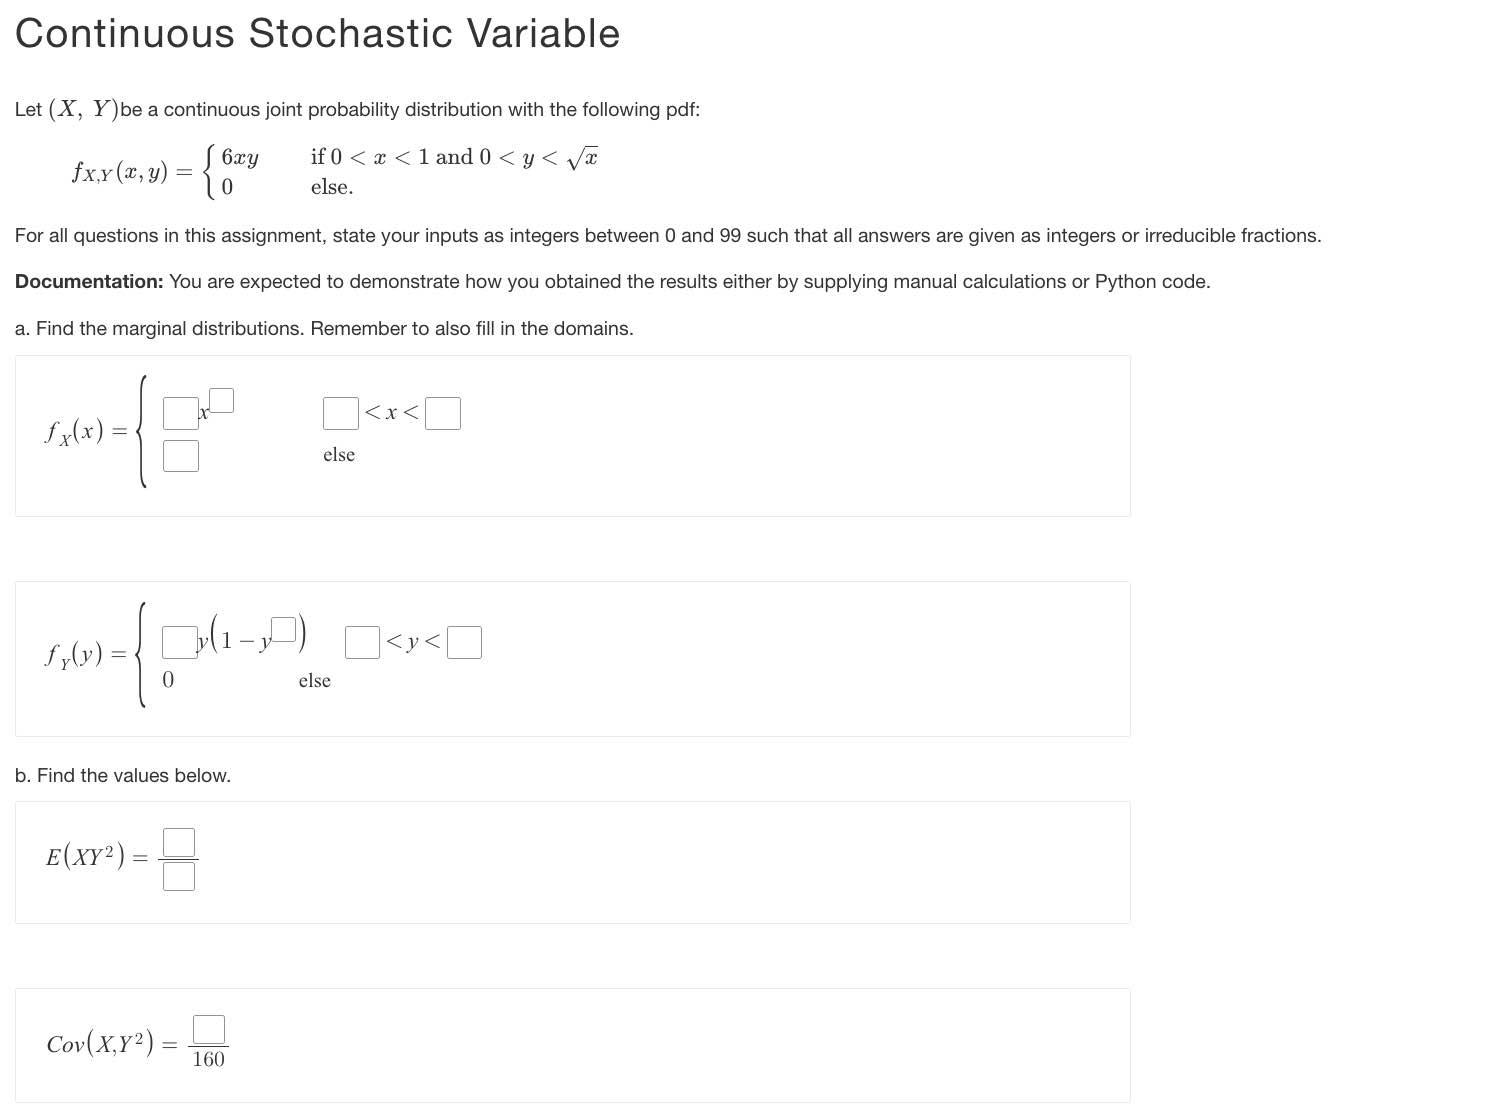

In [17]:
# Exercise 2:
Image('https://cdn.mathpix.com/snip/images/V_HKNZYam9JGXC4NLY1AXExlQcaB7nRQf3T4onnqDs4.original.fullsize.png', width = 700)

In [118]:
# a

x, y, u = smp.symbols('x y u', real = True)

JOINT_PDF = 6*x*y

X_DOMAIN_RANGE = (x, 0, 1)
Y_DOMAIN_RANGE = (y, 0, smp.sqrt(x))

print("Joint Probability Density Function:")
display(JOINT_PDF)

X_MPDF = smp.integrate(JOINT_PDF, (y, 0, 1), conds = "none")
Y_MPDF = smp.integrate(JOINT_PDF, X_DOMAIN_RANGE, conds = "none")

print("X Marginal PDF - PDF(X):")
display(X_MPDF)

print("Y Marginal PDF - PDF(Y):")
display(Y_MPDF)

Joint Probability Density Function:


6*x*y

X Marginal PDF - PDF(X):


3*x

Y Marginal PDF - PDF(Y):


3*y

In [113]:
# b
E_X_Y2 = smp.integrate(x * (y**2) * JOINT_PDF, (y, 0, smp.sqrt(x)), (x, 0, 1))
print("{:<{}}".format(f"E[X * Y^2]:", 15) + f"{nsimplify(E_X_Y2, tolerance=1e-10)}, {round(float(E_X_Y2), 2)}")

E[X * Y^2]:    3/10, 0.3


In [98]:
# c

E_X = smp.integrate(x * X_MPDF, (x, 0, 1))
print("{:<{}}".format(f"E[X]:", 15) + f"{nsimplify(E_X, tolerance=1e-10)}, {round(float(E_X), 2)}")

E_Y2 = smp.integrate(y**2 * Y_MPDF, (y, 0, smp.sqrt(x)), (x, 0, 1))
print("{:<{}}".format(f"E[Y^2]:", 15) + f"{nsimplify(E_Y2, tolerance=1e-10)}, {round(float(E_Y2), 2)}")

COV_X_Y2 = E_X_Y2 - E_X * E_Y2

print("{:<{}}".format(f"COV_X_Y2:", 15) + f"{nsimplify(COV_X_Y2, tolerance=1e-10)}, {round(float(COV_X_Y2), 2)}")

E[X]:          3/4, 0.75
E[Y^2]:        1/4, 0.25
COV_X_Y2:      9/80, 0.11


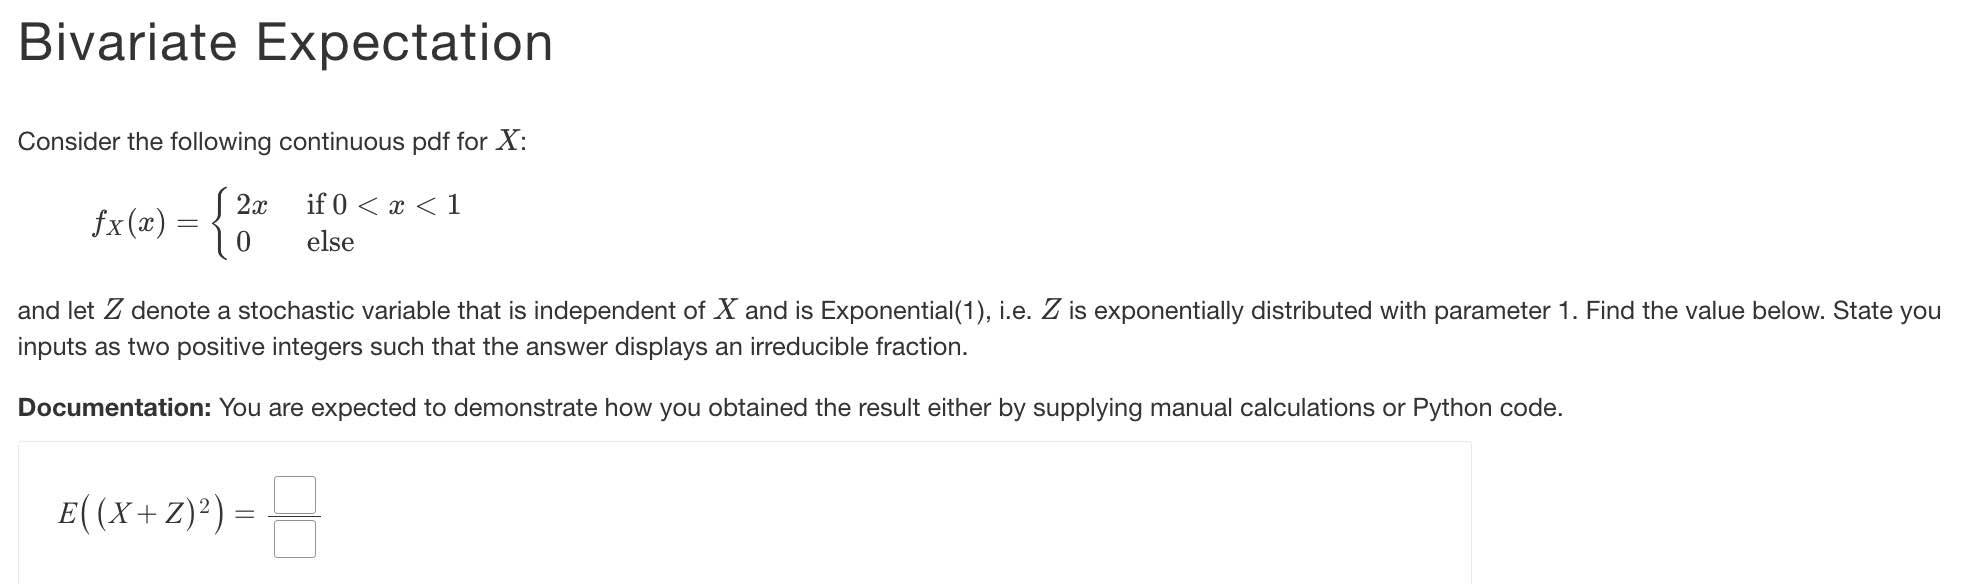

In [29]:
# Exercise 3:
Image('https://cdn.mathpix.com/snip/images/T5WxoPIaLD5Clnw23XIW1ViH7WEhU93CC6uMEOoLbgE.original.fullsize.png', width = 700)

In [43]:
# Z ~ Exponential(1), also X ⫫ Z

#   E[(X + Z)^2] 
# = E[ X^2 + 2*X*Z + Z^2]
# = E[X^2] + E[2*X*Z] + E[Z^2] (Linearity of expectations)
# = E[X^2] + 2*E[X*Z] + E[Z^2] (Constant outside expectation)
# = E[X^2] + 2 * E[X] * E[Z] + E[Z^2] since X ⫫ Z

E_X = smp.integrate(2*x**2, (x, 0, 1))
E_X2 = smp.integrate(2*x**3, (x, 0, 1))
E_Z = expon.mean(1)
E_Z2 = expon(1).expect(lambda x : x**2)

result = E_X2 + 2 * E_X * E_Z + E_Z2

print("{:<{}}".format(f"E[X]:", 15) + f"{nsimplify(E_X, tolerance=1e-10)}, {round(float(E_X), 2)}")
print("{:<{}}".format(f"E[X^2]:", 15) + f"{nsimplify(E_X2, tolerance=1e-10)}, {round(float(E_X2), 2)}")
print("{:<{}}".format(f"E[Z]:", 15) + f"{nsimplify(E_Z, tolerance=1e-10)}, {round(float(E_Z), 2)}")
print("{:<{}}".format(f"E[Z^2]:", 15) + f"{nsimplify(E_Z2, tolerance=1e-10)}, {round(float(E_Z2), 2)}")

print()

answers(result, 2)

E[X]:          2/3, 0.67
E[X^2]:        1/2, 0.5
E[Z]:          2, 2.0
E[Z^2]:        5, 5.0

Exact result:  8.16666666666667,
Rounded (2):   8.17
Fraction:      49/6


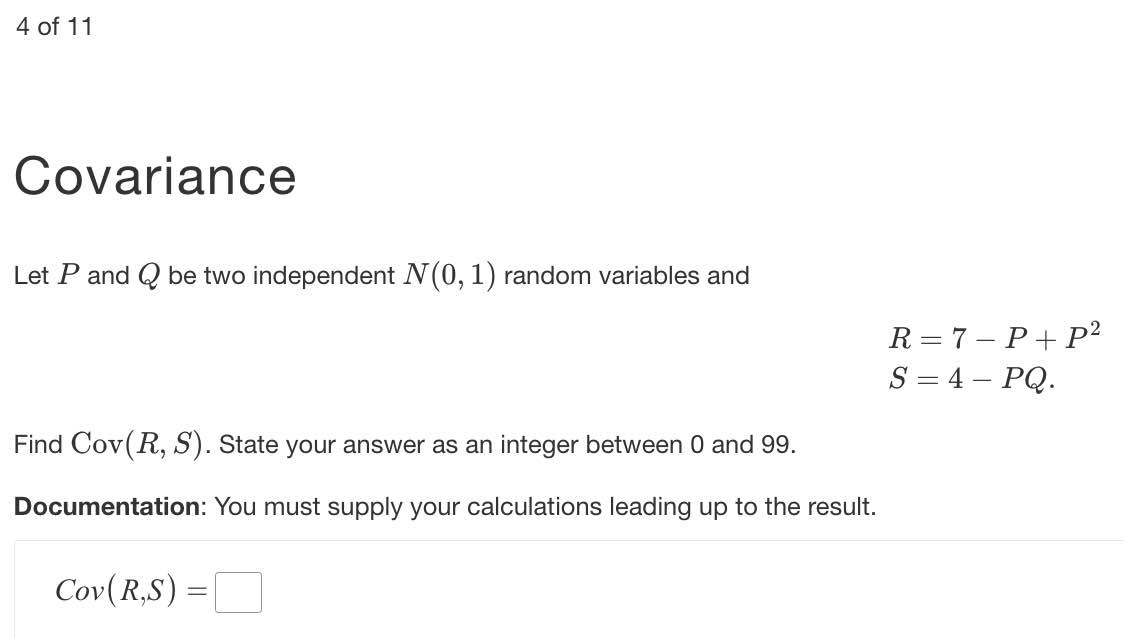

In [44]:
# Exercise 4:
Image('https://cdn.mathpix.com/snip/images/B3Pup11AX07qO_VELrRBUxtR9JudGzS0ogNIlWPj28Q.original.fullsize.png', width = 550)

In [47]:
# Cov(R, S) =
# Cov(7 - P + P^2 , 4 - PQ) =
# Cov(P^2 - P, -PQ) =
# -Cov(PQ, P^2) + Cov(PQ, P) =
# Cov(PQ, P) - Cov(PQ, P^2) =

# E[P^2 * Q]      -   E[PQ] * E[P]      - (E[P^3 * Q]     - E[PQ] * E[P^2]) =
# E[P^2] * E[Q]   -   E[P]^2 * E[Q]     - E[P^3] * E[Q]   + E[P^2] * E[P] * E[Q]

E_P = norm(0, 1).mean()
E_P2 = norm(0, 1).expect(lambda x : x**2)
E_P3 = norm(0, 1).expect(lambda x : x**3)

E_Q = norm(0, 1).mean()

result = E_P2 * E_Q - E_P2 * E_Q - E_P3 * E_Q + E_P2 * E_P * E_Q


print("{:<{}}".format(f"E[P]:", 15) + f"{nsimplify(E_P, tolerance=1e-10)}, {round(float(E_P), 2)}")
print("{:<{}}".format(f"E[P^2]:", 15) + f"{nsimplify(E_P2, tolerance=1e-10)}, {round(float(E_P2), 2)}")
print("{:<{}}".format(f"E[P^3]:", 15) + f"{nsimplify(E_P3, tolerance=1e-10)}, {round(float(E_P3), 2)}")
print("{:<{}}".format(f"E[Q]:", 15) + f"{nsimplify(E_Q, tolerance=1e-10)}, {round(float(E_Q), 2)}")

print()

answers(result, 2)

E[P]:          0, 0.0
E[P^2]:        1, 1.0
E[P^3]:        0, 0.0
E[Q]:          0, 0.0

Exact result:  0.0,
Rounded (2):   0.0
Fraction:      0


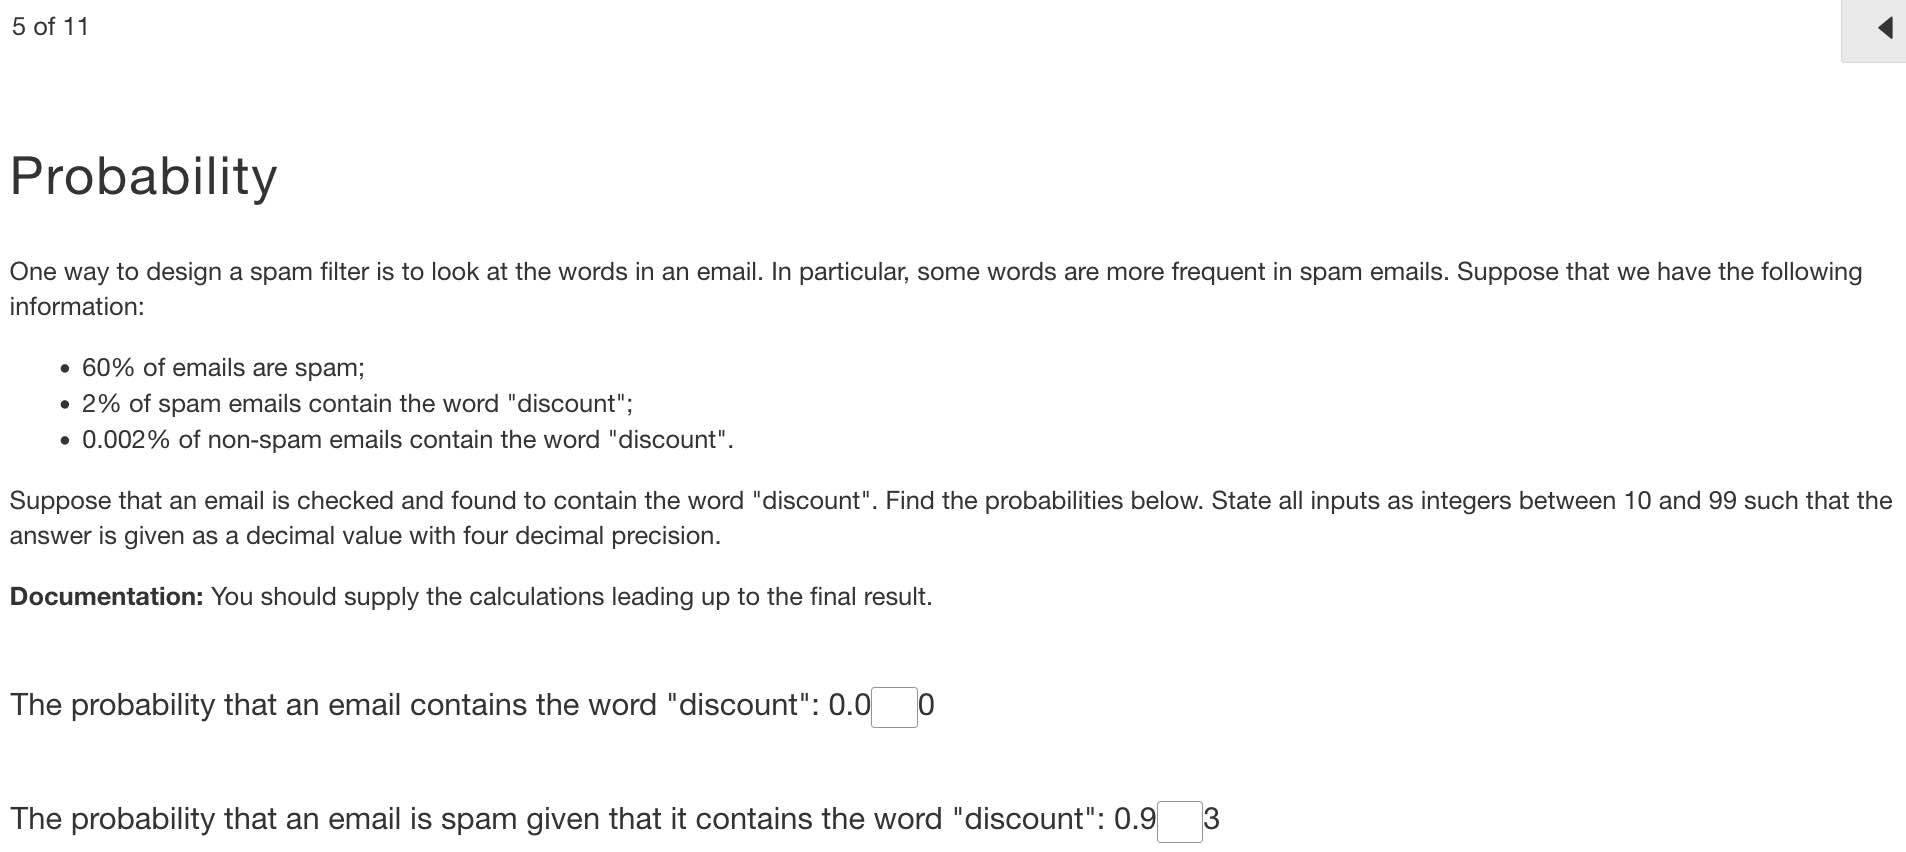

In [48]:
# Exercise 5:
Image('https://cdn.mathpix.com/snip/images/9QG5Wowr5RZkwgE4qBPP4cg1Y5EGu556Zu0X2XBaxWQ.original.fullsize.png', width = 550)

In [ ]:
# This one sounds familiar from MSE
# Law of Total Prob + Bayes Theorem, exercise template :)

# We are given:

# P(S) = 0.6
# P(Discount | S) = 0.02
# P(Discount | !S) = 0.00002 => this is a tricky one to miss :D

# We find:
# P(!S) = 1 - P(S) = 1 - 0.6 = 0.4

# Question 1:
# P(Discount) = P(Discount | S) * P(S) + P(Discount | !S) * P(!S) = 0.02 * 0.6 + 0.00002 * 0.4 = 0.012 + 0.000008 = 0.012008

# Question 2:
# P(S | Discount) = P(Discount | S) * P(S) / P(Discount) = 0.02 * 0.6 / 0.012008 = 0.999333


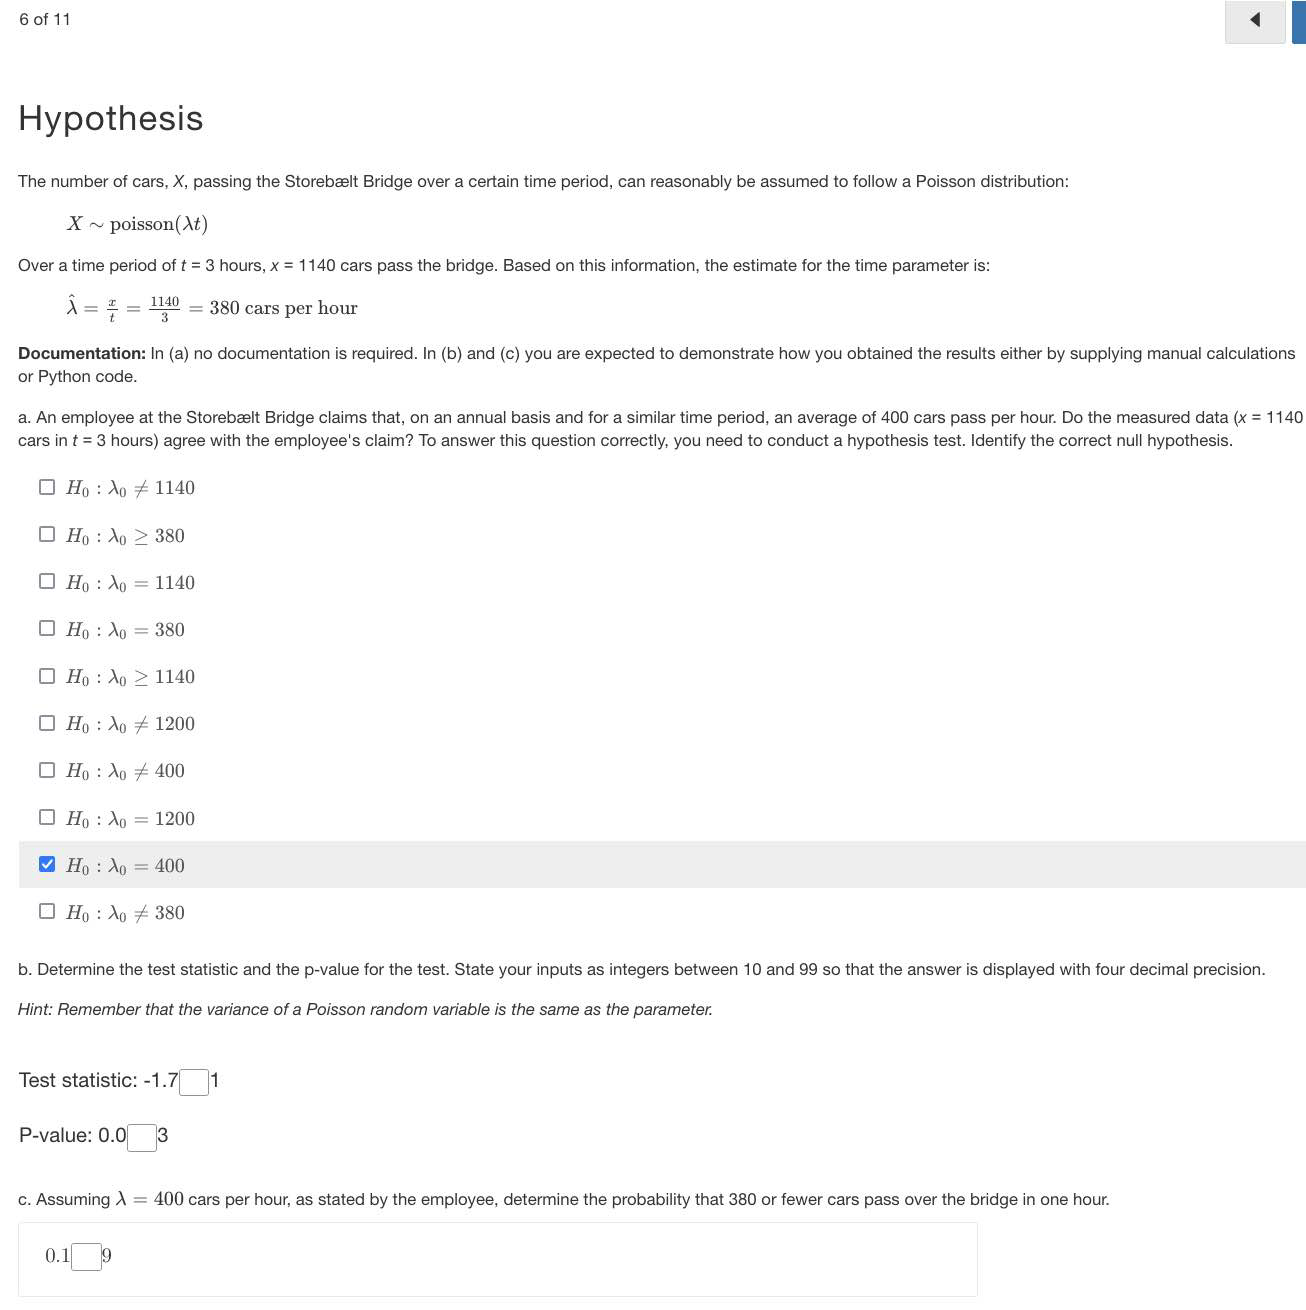

In [109]:
# Exercise 6:
Image('https://cdn.mathpix.com/snip/images/aKLqbZym8GtnpiDFd5noa-JPdri7xge8-H5jpkDs6so.original.fullsize.png', width = 550)

In [ ]:
# Had no time left

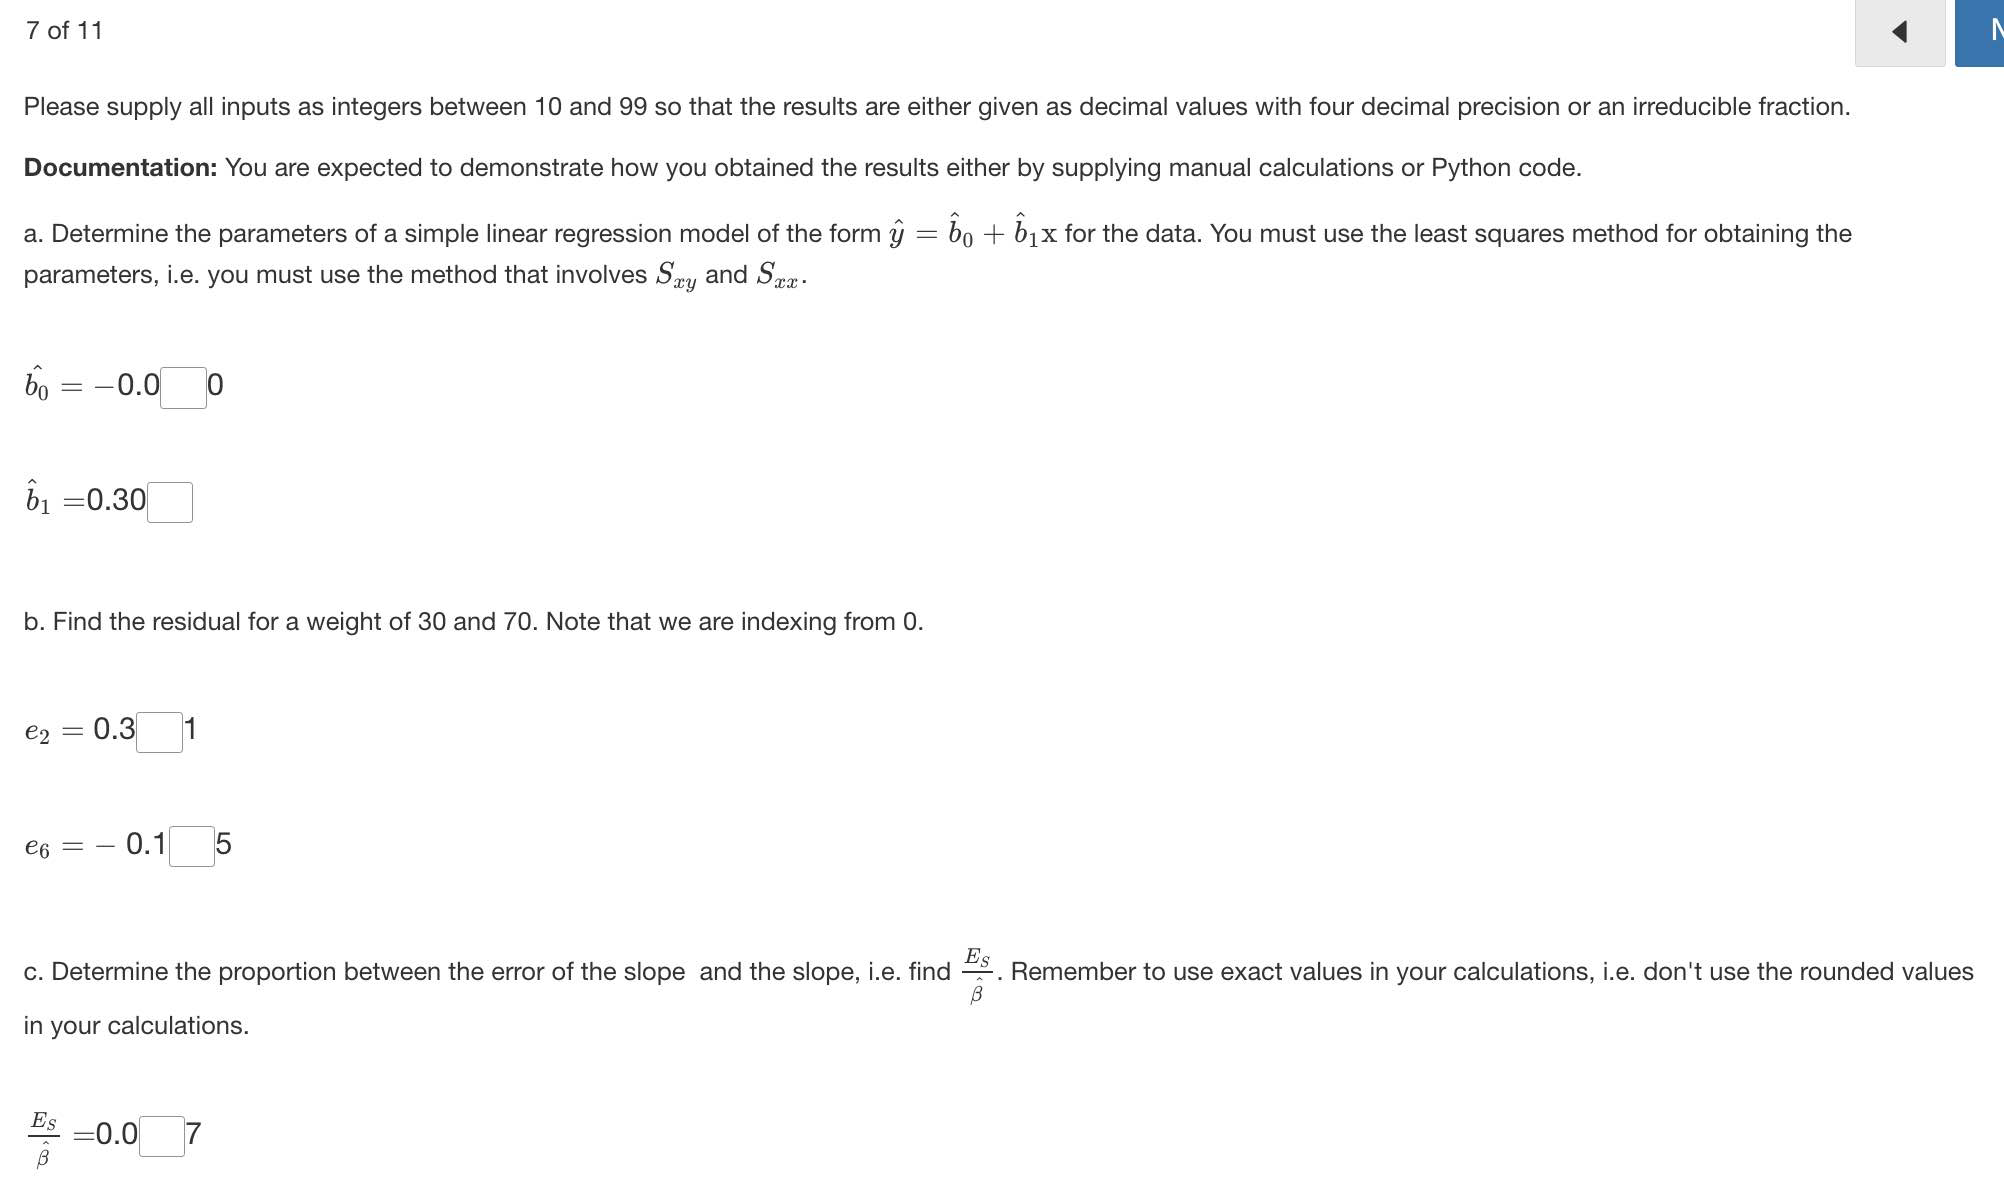

In [94]:
# Exercise 7:
Image('https://cdn.mathpix.com/snip/images/dchLLlnDkFCvbFgpe8_JudIt8CoNDNeVvHOs4paqsvo.original.fullsize.png', width = 700)

In [104]:
# Given data pairs
data = [(10, 3.11), (20, 5.68), (30, 9.41), (40, 11.58), (50, 15.42), (60, 18.18), (70, 20.87), (80, 24.25), (90, 26.58), (100, 30.42)]

# Extract x and y values
x = [pair[0] for pair in data]
y = [pair[1] for pair in data]

# Number of data pairs
n = len(data)

# Calculate x̄ and ȳ (mean of x and y values)
x_mean = np.mean(x)
y_mean = np.mean(y)

# Calculate Sxy (sum of cross-products)
Sxy = np.sum(np.multiply(x, y)) - n * x_mean * y_mean

# Calculate Sxx (sum of squared x)
Sxx = np.sum(np.square(x)) - n * np.square(x_mean)

# Calculate β^1 (slope)
slope = Sxy / Sxx

# Calculate β^0 (intercept)
intercept = y_mean - slope * x_mean

# Calculate y^x=2 (predicted y value for x = 2)
x_value = 2
predicted_y = intercept + slope * x_value

# Calculate σ^2 (mean squared error)
residuals = [y[i] - (intercept + slope * x[i]) for i in range(n)]
mean_squared_error = np.sum(np.square(residuals)) / (n - 2)

# Calculate Test Statistic for slope (T0)
T0 = slope / np.sqrt(mean_squared_error / Sxx)

# Calculate the error of a 95% Confidence interval on the intercept (EI)
t_critical = t.ppf(0.975, n - 2)
intercept_error = t_critical * np.sqrt(mean_squared_error * (1 / n + np.square(x_value - x_mean) / Sxx))

# Calculate the error of a 95% Confidence interval on the slope (ES)
slope_error = t_critical * np.sqrt(mean_squared_error / Sxx)

# Calculate the error of a 95% Prediction interval for x = 2 (EP)
prediction_interval_error = t_critical * np.sqrt(mean_squared_error * (1 + 1 / n + np.square(x_value - x_mean) / Sxx))

# Calculate the correlation coefficient (r)
Syy = np.sum(np.square(y - y_mean))
correlation_coefficient = Sxy / np.sqrt(Sxx * Syy)

# Round the values to 4 decimal places
Sxy = round(Sxy, 4)
Sxx = round(Sxx, 4)
y_mean = round(y_mean, 4)
x_mean = round(x_mean, 4)
slope = round(slope, 4)
intercept = round(intercept, 4)
predicted_y = round(predicted_y, 4)
mean_squared_error = round(mean_squared_error, 4)
T0 = round(T0, 4)
intercept_error = round(intercept_error, 4)
slope_error = round(slope_error, 4)
prediction_interval_error = round(prediction_interval_error, 4)
correlation_coefficient = round(correlation_coefficient, 4)

# Print the calculated values
print("Sxy =", Sxy)
print("Sxx =", Sxx)
print("y¯ =", y_mean)
print("x¯ =", x_mean)
print("β^1 =", slope)
print("β^0 =", intercept)
print("y^x=2 =", predicted_y)
print("σ^2 =", mean_squared_error)
print("Test Statistic for slope (T0) =", T0)
print("Error of a 95% Confidence interval on the intercept (EI) =", intercept_error)
print("Error of a 95% Confidence interval on the slope (ES) =", slope_error)
print("Error of a 95% Prediction interval for x = 2 (EP) =", prediction_interval_error)
print("The correlation coefficient is", correlation_coefficient)

# Couldn't figure out the residuals

Sxy = 2484.6
Sxx = 8250.0
y¯ = 16.55
x¯ = 55.0
β^1 = 0.3012
β^0 = -0.014
y^x=2 = 0.5883
σ^2 = 0.133
Test Statistic for slope (T0) = 75.0134
Error of a 95% Confidence interval on the intercept (EI) = 0.5581
Error of a 95% Confidence interval on the slope (ES) = 0.0093
Error of a 95% Prediction interval for x = 2 (EP) = 1.0093
The correlation coefficient is 0.9993


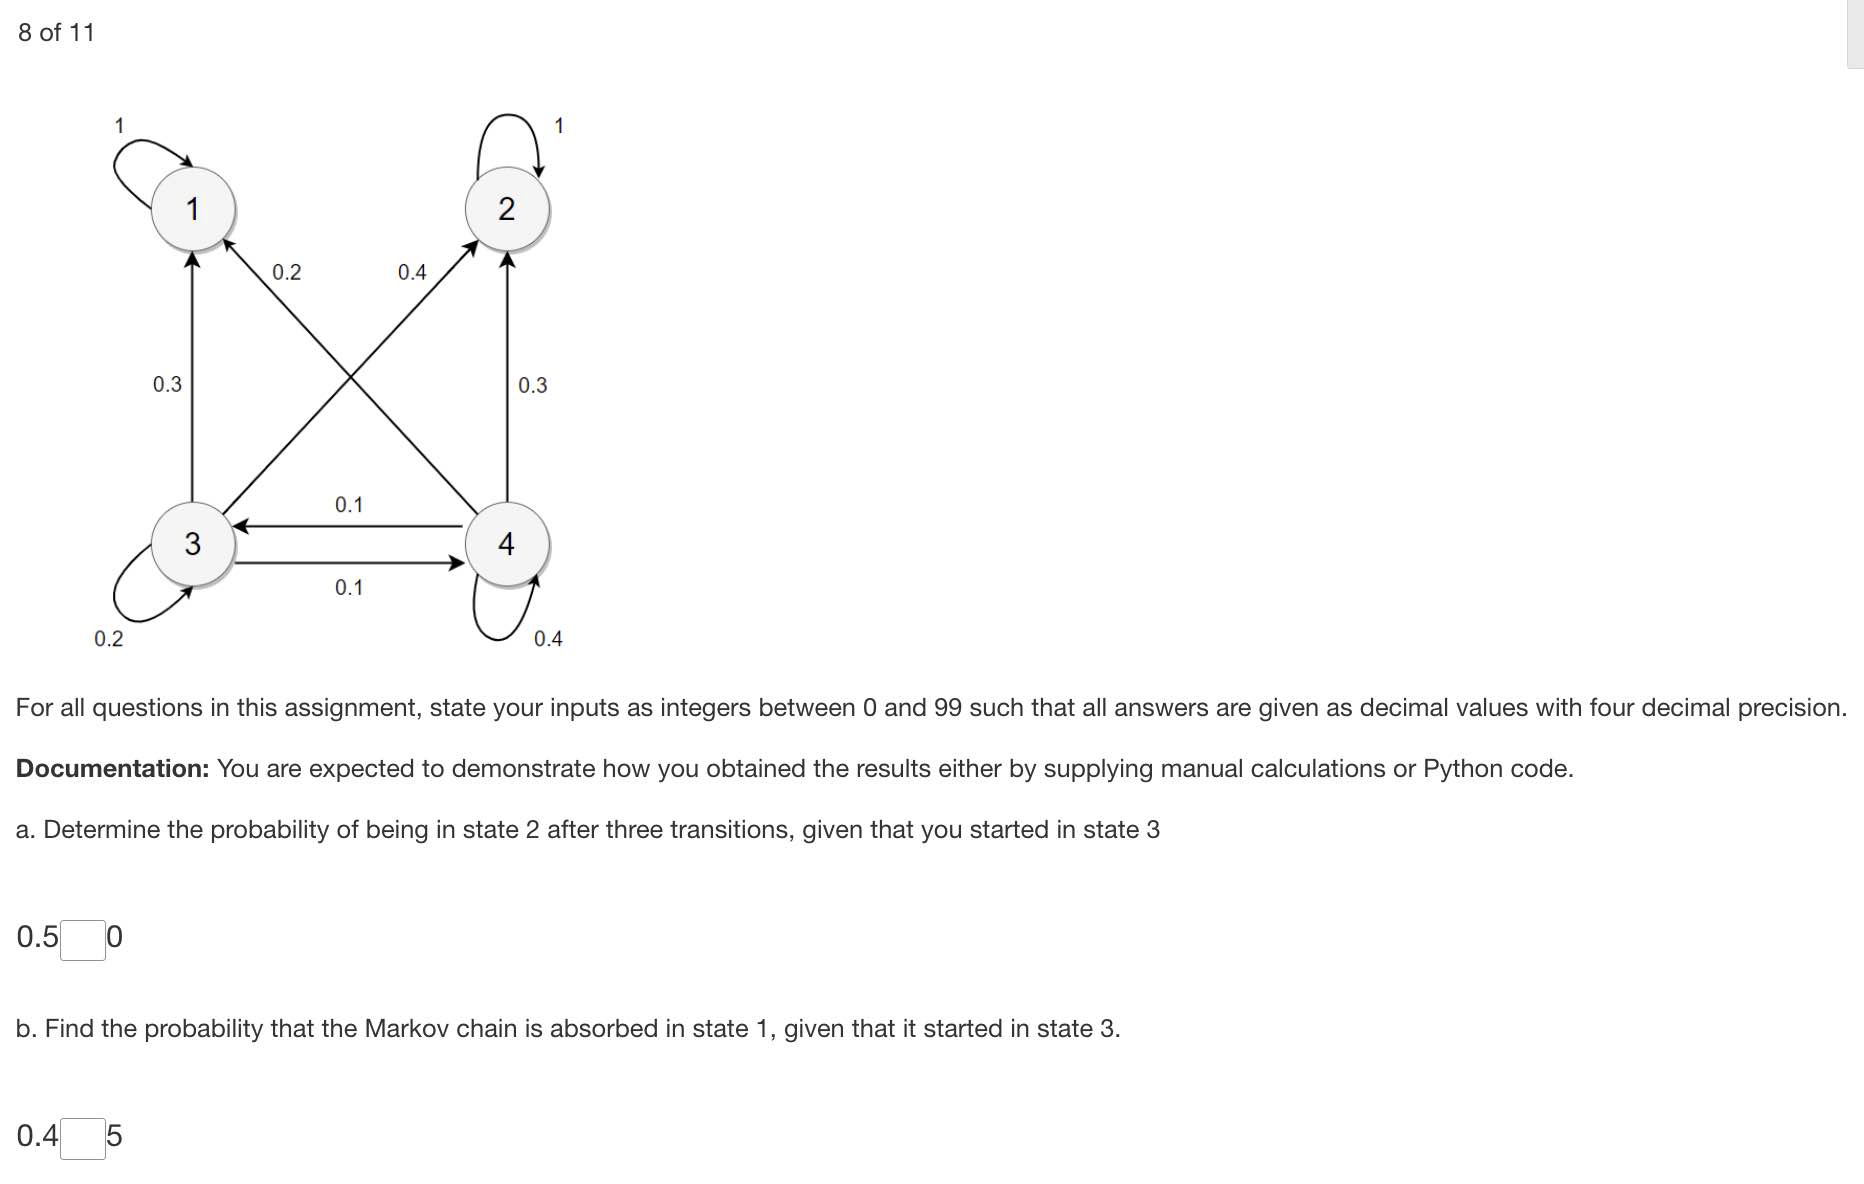

In [72]:
# Exercise 8:
Image('https://cdn.mathpix.com/snip/images/N_7MGccjFbeT6nfZSZ0H63b3YTj7QB7LY725aRfdZUk.original.fullsize.png', width = 800)

In [82]:
# a)

TPM = Matrix(
    [
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0.3, 0.4, 0.2, 0.1],
        [0.2, 0.3, 0.1, 0.4],
    ]
)

# We read the result from intersection of row 3 with column 2 -> 0.548
pprint(TPM**3)


⎡  1      0      0      0  ⎤
⎢                          ⎥
⎢  0      1      0      0  ⎥
⎢                          ⎥
⎢0.407  0.548  0.016  0.029⎥
⎢                          ⎥
⎣0.362  0.535  0.029  0.074⎦


In [88]:
# b)

TPM = Matrix(
    [
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0.3, 0.4, 0.2, 0.1],
        [0.2, 0.3, 0.1, 0.4],
    ]
)

# Starts from state 3
p0 = Matrix(
    [
        [0, 0, 1, 0]
    ]
)

# We do a bunch of iterations
pprint(p0*TPM**500)


[0.425531914893617  0.574468085106383  3.91155738045995e-179  9.44333487790698
e-179]


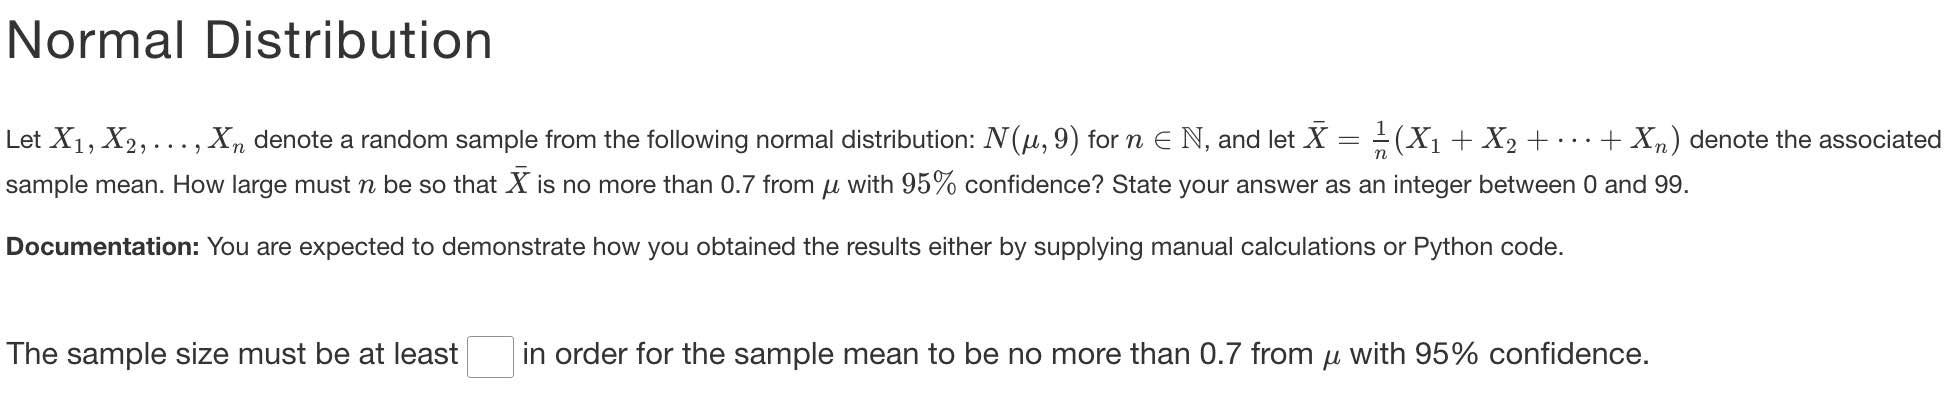

In [50]:
# Exercise 9:
Image('https://cdn.mathpix.com/snip/images/Bv0cBu-jnlQzMVkWuoArAAszr8NNK3bb6vSWXc0a3CI.original.fullsize.png', width = 800)

In [92]:
margin_of_error = 0.7
confidence_level = 0.95
standard_deviation = sqrt(9)

z = 1.96  # Z-score for 95% confidence level

n = (z * standard_deviation / margin_of_error) ** 2
print(n)
sample_size = math.ceil(n)  # Round up to the nearest whole number

print("The required sample size is:", sample_size)

70.56
The required sample size is: 71


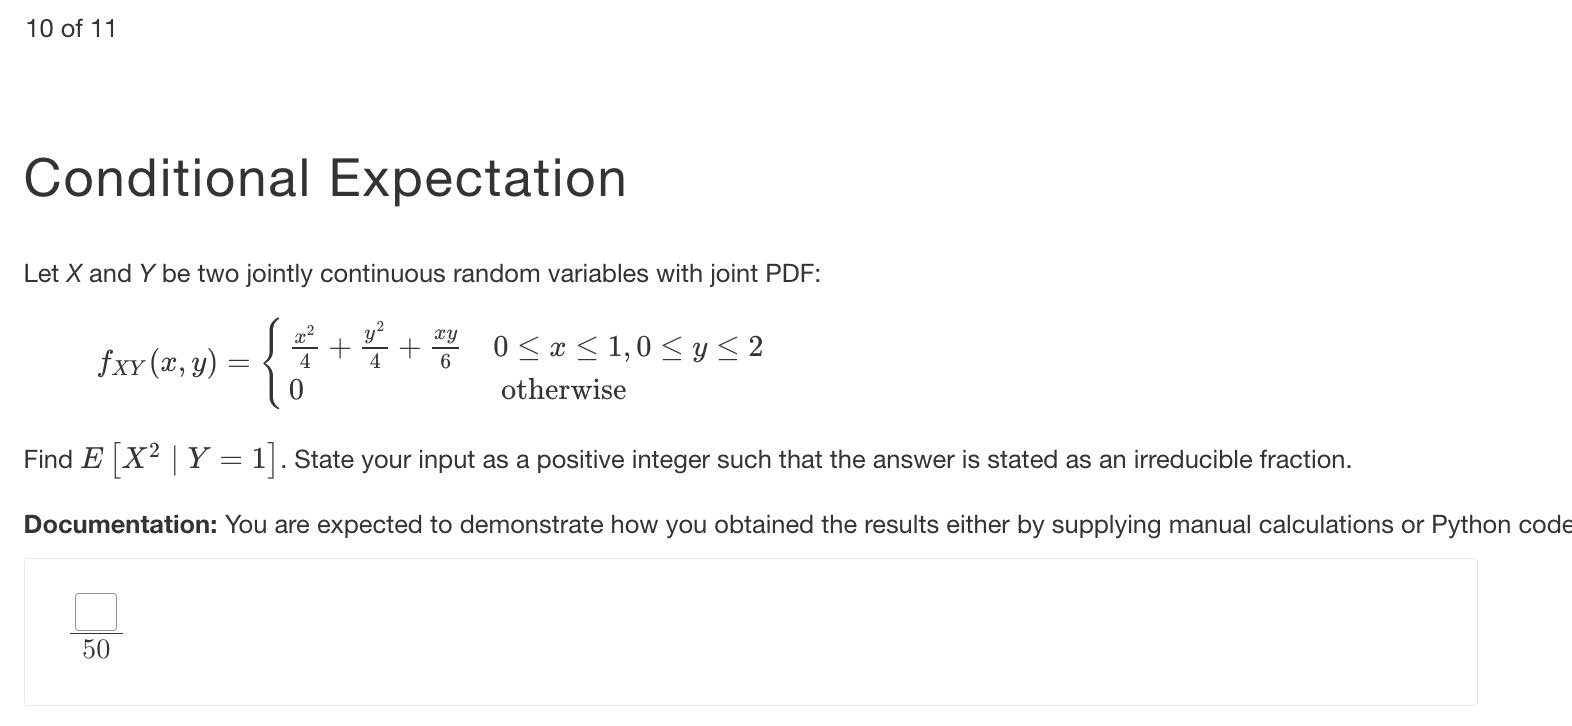

In [52]:
# Exercise 10:
Image('https://cdn.mathpix.com/snip/images/52KpOo4ngs5GFN7a9LbQpOugCPxK-p1PWTvdKWe_VUU.original.fullsize.png', width = 700)

In [54]:
x, y = smp.symbols('x y', real = True)

JOINT_PDF = ((x**2)/4) + ((y**2)/4) + ((x*y)/6)

X_DOMAIN_RANGE = (x, 0, 1)
Y_DOMAIN_RANGE = (y, 0, 2)

print("Joint Probability Density Function:")
display(JOINT_PDF)

X_MPDF = smp.integrate(JOINT_PDF, Y_DOMAIN_RANGE, conds = "none")
Y_MPDF = smp.integrate(JOINT_PDF, X_DOMAIN_RANGE, conds = "none")

print("X Marginal PDF - PDF(X):")
display(X_MPDF)

print("Y Marginal PDF - PDF(Y):")
display(Y_MPDF)

# -------------------- Conditional PDFs --------------------

X_CONDITIONAL_PDF_GIVEN_Y = smp.simplify(JOINT_PDF / Y_MPDF)
print("X Conditional PDF Given Y - PDF(X | Y):")
display(X_CONDITIONAL_PDF_GIVEN_Y)

Y_CONDITIONAL_PDF_GIVEN_X = smp.simplify(JOINT_PDF / X_MPDF)
print("Y Conditional PDF Given X - PDF(Y | X):")
display(Y_CONDITIONAL_PDF_GIVEN_X)

# Example: E[X^2 | Y = 1]
Y_VALUE = 1
E_X2_GIVEN_Y = smp.integrate((x**2) * smp.simplify(X_CONDITIONAL_PDF_GIVEN_Y.subs(y, Y_VALUE)), X_DOMAIN_RANGE)
print("{:<{}}".format(f"E[X | Y = {Y_VALUE}]:", 35) + f"{nsimplify(E_X2_GIVEN_Y, tolerance=1e-10)}, {round(float(E_X2_GIVEN_Y), 2)}")

Joint Probability Density Function:


x**2/4 + x*y/6 + y**2/4

X Marginal PDF - PDF(X):


x**2/2 + x/3 + 2/3

Y Marginal PDF - PDF(Y):


y**2/4 + y/12 + 1/12

X Conditional PDF Given Y - PDF(X | Y):


(3*x**2 + 2*x*y + 3*y**2)/(3*y**2 + y + 1)

Y Conditional PDF Given X - PDF(Y | X):


(3*x**2 + 2*x*y + 3*y**2)/(2*(3*x**2 + 2*x + 4))

E[X | Y = 1]:                      21/50, 0.42


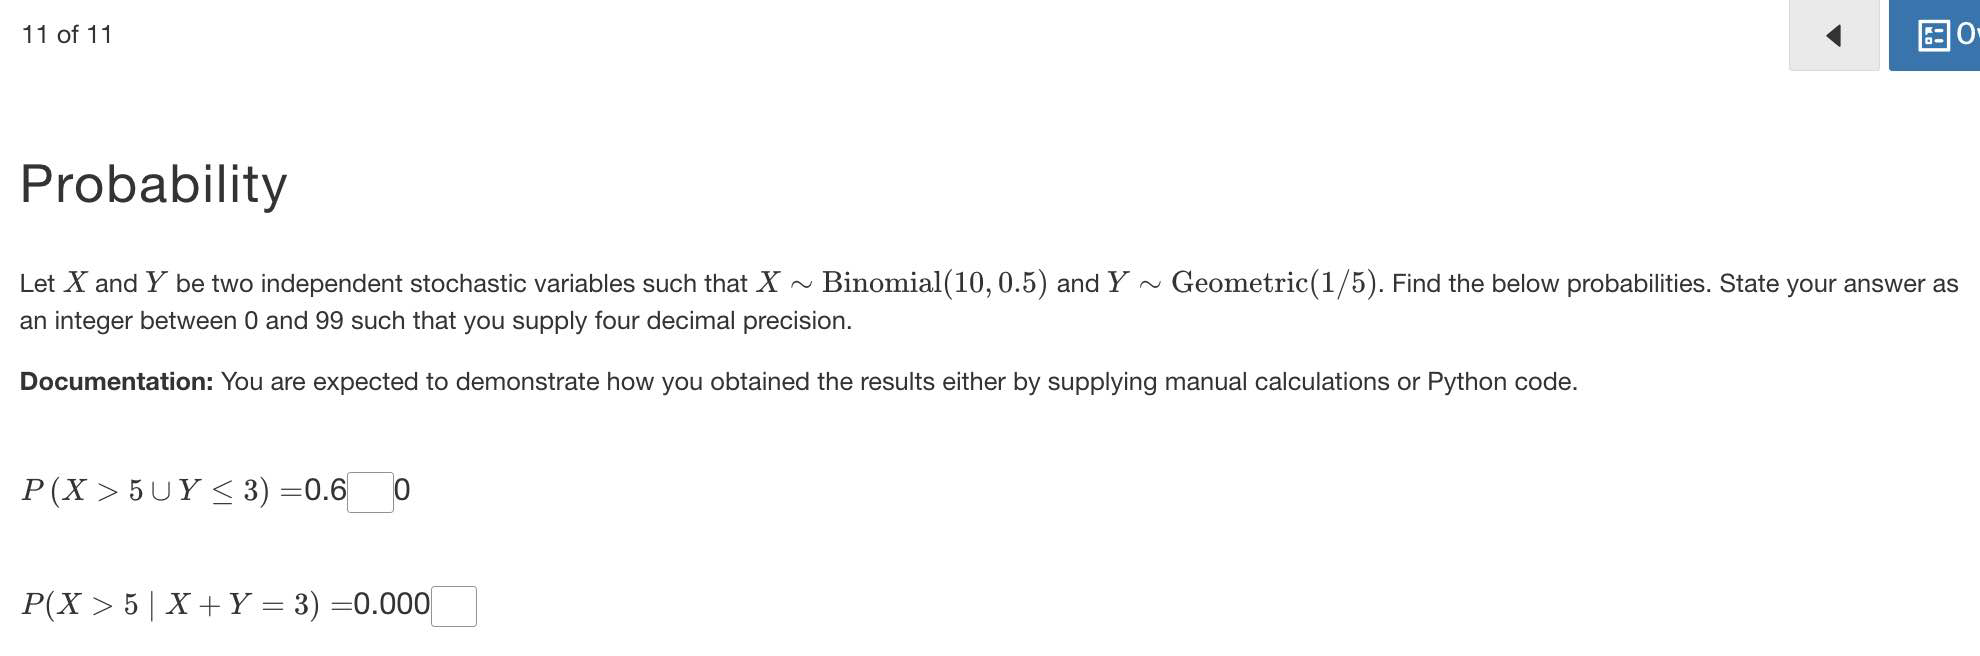

In [56]:
# Exercise 11:
Image('https://cdn.mathpix.com/snip/images/RI-vHf4TWwdfwT4Jerlf8tWbCrN4YVV6CHCRjN5i2cQ.original.fullsize.png', width = 700)

In [70]:
# P(X > 5 or Y <= 3) = P(X > 5) + P(Y <= 3) - P(X > 5) * P(Y <= 3)

result = binom.sf(5, 10, 0.5) + geom.cdf(3, 1/5) - binom.sf(5, 10, 0.5) * geom.cdf(3, 1/5)

print("P(X > 5 or Y <= 3):")
answers(result, 4)

# P(X > 5 | X + Y = 3) = P(X > 5 and X + Y = 3) / P(X + Y = 3), however this X > 5 and X + Y = 3 is impossible so
# P(X > 5 | X + Y = 3) = 0

P(X > 5 or Y <= 3):
Exact result:  0.6809999999999999,
Rounded (4):   0.681
Fraction:      1737090461872647*2**(14/17)*3**(5/17)*35**(9/17)/40960000000000000
